# Analysis of the FIFA19 players database

I created this notebook in order to work on different aspects of data analysis, and data visualisation using the FIFA19 players database. I aim to answer the following questions:

### A) Best countries and teams

What are the best teams when only the "professional squad" (i.e. the best 22 players) is included ? 

What are the best countries ? Does it correlate with total number of players in the country ?
    
### B) Club ranking in each league

What are the best clubs of each league for the top 5 countries (England, Spain, Germany, Italy, France) according to their best 22 players (i.e. professional squad) ? 

Does the team property overall correlate with the current ranking in the championship ? That is, does the FIFA19 player property model predict well the ranking in real-life ?
   
   
### C) Player properties and position

Can we determine the position of the players according to their properties ? 
Do we see any porosity/link between the player positions ? 


### D) Quality/price ratio

What are the best players to choose if I want to set up a squad with a limited budget ? 


#### Read csv file

In [302]:
# import necessary modules
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualisation
import matplotlib.pyplot as plt # plot
import os

In [303]:
# read csv file and EDA
#fifa19_df = pd.read_csv('../input/data.csv')
fifa19_df = pd.read_csv('fifa19.csv')
fifa19_df.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


#### Perform some dataframe manipulation 

The value, wage, and release columns are string, they are therefore converted to float for subsequent data manipulation. I also created a relative potential feature from the "absolute" potential.

In [304]:
# convert values and wages columns to floats
fifa19_df['Value_float'] = fifa19_df['Value'].str[1:].str.replace('M','e6').str.replace('K','e3').astype(float)
fifa19_df['Wage_float'] = fifa19_df['Wage'].str[1:].str.replace('M','e6').str.replace('K','e3').astype(float)
fifa19_df['Release_float'] = fifa19_df['Release Clause'].str[1:].str.replace('M','e6').str.replace('K','e3').astype(float)
fifa19_df['Potential_rel'] = fifa19_df['Potential']-fifa19_df['Overall']

### A) Best countries and teams

What are the best teams when only the "professional squad" (i.e. the best 22 players) is included ? 

What are the best countries ? Does it correlate with total number of players in the country ?

#### Create country and team dataframes giving the mean value of the 22 best players from the players database with a pivot_table.

For the country dataframe, we only select countries which have at least 22 players. 

In [305]:
# order countries according to average values of 22 best players
country_value = fifa19_df.pivot_table(index='Nationality',columns='Name',values='Overall')
country_value['Mean_22pl'] = country_value.apply(lambda x: x.sort_values(ascending=False)[:22].mean(), axis=1)
country_value['std_22pl'] = country_value.apply(lambda x: x.sort_values(ascending=False)[:22].std(), axis=1)
country_value['Nplayers'] = country_value.count(axis=1)
country_value = country_value.sort_values('Mean_22pl',ascending=False)#.reset_index(level=0, inplace=True)
country_value.reset_index(level=0, inplace=True)
country_value = country_value.drop(country_value[country_value['Nplayers'] < 23].index, axis=0)
#
# order teams according to average values of 22 best players
team_value = fifa19_df.pivot_table(index='Club',columns='Name',values='Overall')
team_value['Mean_whole'] = team_value.mean(axis=1)
team_value['Mean_22pl'] = team_value.apply(lambda x: x.sort_values(ascending=False)[:22].mean(), axis=1)
team_value['std_22pl'] = team_value.apply(lambda x: x.sort_values(ascending=False)[:22].std(), axis=1)
team_value['std_whole'] = team_value.std(axis=1)
team_value['Nplayers'] = team_value.count(axis=1)
team_value = team_value.sort_values('Mean_22pl',ascending=False)
team_value.reset_index(level=0, inplace=True)

#### Violin plot showing the 30 best teams

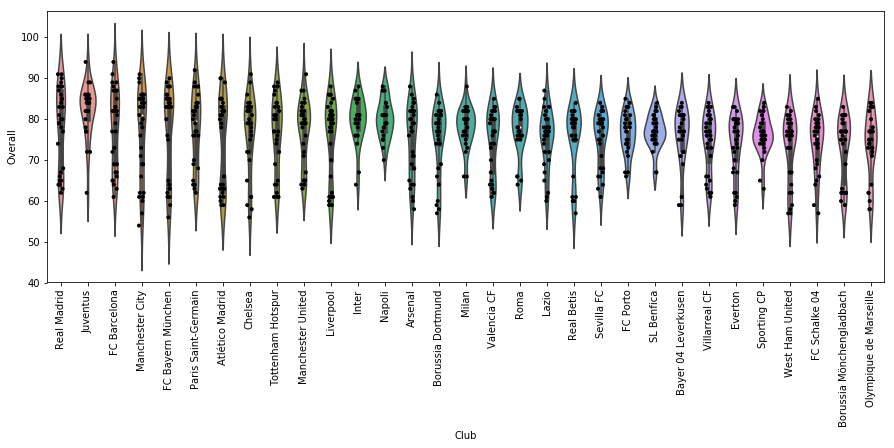

In [344]:
plt.figure(0,figsize=[15,5])
sns.violinplot(x='Club', y='Overall', data=fifa19_df, size=4,jitter=True, orient='v',order=team_value.loc[:30,'Club'])
sns.stripplot(x='Club', y='Overall', data=fifa19_df, size=4,jitter=True, orient='v',order=team_value.loc[:30,'Club'],color='k')
plt.xticks(rotation = 90);

#### Scatter plot ranking the best countries

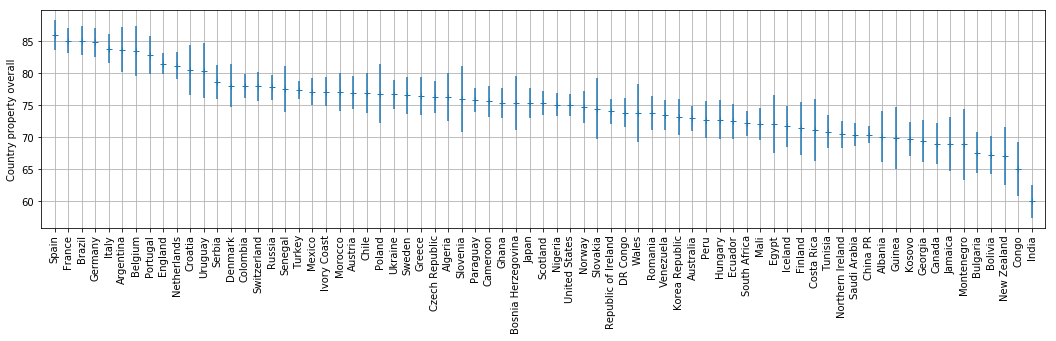

In [346]:
plt.figure(0, figsize=[18,4])
plt.xscale('linear')
plt.yscale('linear')
plt.ylabel('Country property overall')
plt.xlim(-1,len(country_value))
plt.grid()
#plt.scatter(range(len(country_value)), country_value['Mean_22pl'], marker='.') #, label=pos)
plt.errorbar(range(len(country_value)), country_value['Mean_22pl'], yerr=country_value['std_22pl'], fmt='+')
plt.xticks(range(len(country_value)), country_value['Nationality'], rotation=90);


#### Does the country property overall correlate with the reservoir of players ?

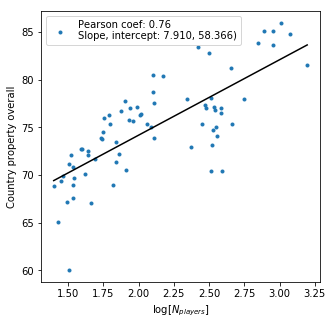

In [340]:
logvalue = np.log10(country_value['Nplayers'])
meancountry = country_value['Mean_22pl']
slope, inter = np.polyfit(logvalue, meancountry, 1)
pearson = np.corrcoef(logvalue, meancountry)[0, 1]
plt.figure(figsize=[5,5]);
plt.xscale('linear')
plt.yscale('linear')
plt.xlabel('log[$N_{players}$]')
plt.ylabel('Country property overall')
plt.scatter(logvalue, meancountry, marker='.', \
            label=('Pearson coef: %.2f \nSlope, intercept: %.3f, %.3f)' % (pearson, slope, inter)))
plt.plot([np.min(logvalue), np.max(logvalue)],
         [np.min(logvalue)*slope+inter, np.max(logvalue)*slope+inter],ls='-',color='k')
plt.legend();


The reservoir of players within the country impacts the level of the national country. A Pearson coefficient of 0.76 is found between the log value of the number of players and the mean value of the 23 best players. Note that there is a large dispersion around the fit due to the limited number of leagues included in FIFA19. Some weak leagues have been included, increasing the number of players with respect to their level (see Saudi Arabia, or China for instance). Other countries whose leagues are not included in FIFA19 can have nevertheless a good level (see Uruguay, or Croatia for instance).


### B) Club ranking in each league

What are the best clubs of each league for the top 5 countries (England, Spain, Germany, Italy, France) according to their best 22 players (i.e. professional squad) ? 

Does the team property overall correlate with the current ranking in the championship ? That is, does the FIFA19 player property model predict well the league ranking in real-life ?

#### Start by creating the list of clubs and their number of points (as end of March 2018).

In [358]:
# list of clubs of interest to compare 
list_clubs = (fifa19_df.Club.unique().tolist())
list_countries = ['France', 'England', 'Spain', 'Germany', 'Italy']
# Ligue 1 clubs and points
clubs_fr = ['Amiens SC', 'Angers SCO', 'FC Girondins de Bordeaux', 'Stade Malherbe Caen', 'Dijon FCO', 'En Avant de Guingamp', 'LOSC Lille', 'Olympique Lyonnais', 'Olympique de Marseille', 'AS Monaco', 'Montpellier HSC', 'FC Nantes', 'OGC Nice', 'Nîmes Olympique', 'Paris Saint-Germain', 'Stade de Reims', 'Stade Rennais FC', 'AS Saint-Étienne', 'RC Strasbourg Alsace', 'Toulouse Football Club']
points_fr = np.array([28,35,33,20,21,19,57,50,47,27,42,31,40,36,74,43,40,43,38,31])/29. # points divided by number of matches
df_clubs = pd.DataFrame({'Club' : clubs_fr, 'Points' : points_fr, 'Country' : 'France'})
# Premier league clubs and points
clubs_en = ['Arsenal', 'Bournemouth', 'Brighton & Hove Albion', 'Burnley', 'Cardiff City', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Huddersfield Town', 'Leicester City', 'Liverpool', 'Manchester City', 'Manchester United', 'Newcastle United', 'Southampton', 'Tottenham Hotspur', 'Watford', 'West Ham United', 'Wolverhampton Wanderers']
points_en = np.array([60, 38, 33, 30, 28, 57, 33, 40, 17, 14, 41, 76, 74, 58, 35, 30, 61, 43, 42, 44])/31.
df_en = pd.DataFrame({'Club' : clubs_en, 'Points' : points_en, 'Country': 'England'})
df_clubs = df_clubs.append(df_en, ignore_index=True)
# Liga clubs and points
clubs_sp = ['Deportivo Alavés', 'FC Barcelona', 'Real Betis', 'Athletic Club de Bilbao', 'RC Celta', 'SD Eibar', 'RCD Espanyol', 'Getafe CF', 'Girona FC', 'SD Huesca', 'CD Leganés', 'Levante UD', 'Atlético Madrid', 'Real Madrid', 'Sevilla FC', 'Real Sociedad', 'Valencia CF', 'Real Valladolid CF', 'Rayo Vallecano', 'Villarreal CF']
points_sp = np.array([44, 66, 39, 37, 25, 35, 34, 46, 34, 22, 33, 31, 56, 54, 43, 36, 40, 29, 23, 29])/28.
df_sp = pd.DataFrame({'Club' : clubs_sp, 'Points' : points_sp, 'Country': 'Spain'})
df_clubs = df_clubs.append(df_sp, ignore_index=True)
# Serie A clubs and points
clubs_it = ['Atalanta', 'Bologna', 'Cagliari', 'Empoli', 'Fiorentina', 'Frosinone', 'Genoa', 'Inter', 'Juventus', 'Lazio', 'Milan', 'Napoli', 'Parma', 'Roma', 'Sampdoria', 'Sassuolo', 'SPAL', 'Torino', 'Udinese', 'Chievo Verona']
points_it = np.array([45, 24, 30, 25, 37, 17, 33, 53, 75, 45, 51, 60, 33, 47, 42, 32, 26, 44, 25, 11])/28.
df_it = pd.DataFrame({'Club' : clubs_it, 'Points' : points_it, 'Country': 'Italy'})
df_clubs = df_clubs.append(df_it, ignore_index=True)
# Bundesliga clubs and points
clubs_ge = ['FC Bayern München', 'Borussia Dortmund', 'RB Leipzig', 'FC Schalke 04','Bayer 04 Leverkusen', '1. FC Nürnberg', 'TSG 1899 Hoffenheim', 'Borussia Mönchengladbach', 'Hertha BSC', 'SV Werder Bremen', 'VfL Wolfsburg', 'VfB Stuttgart', 'Eintracht Frankfurt', '1. FSV Mainz 05', 'FC Augsburg', 'Fortuna Düsseldorf', 'Hannover 96', 'SC Freiburg']
points_ge = np.array([60, 60, 49, 23, 42, 13, 38, 47, 35, 39, 42, 20, 46, 30, 25, 31, 30, 31])/26.
df_ge = pd.DataFrame({'Club' : clubs_ge, 'Points' : points_ge, 'Country' : 'Germany'})
df_clubs = df_clubs.append(df_ge, ignore_index=True)

#### Plot the levels of each team among the five leagues

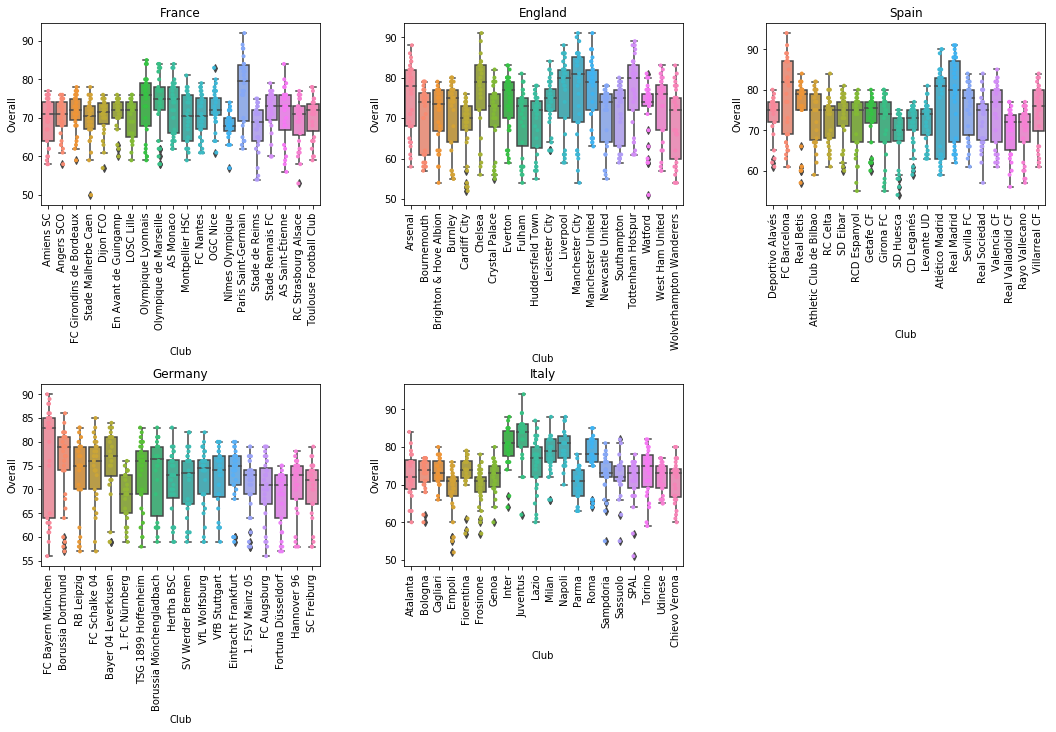

In [359]:
# box plots for Ligue 1 teams
clubs_all = [clubs_fr, clubs_en, clubs_sp, clubs_ge, clubs_it]
plt.figure(0,figsize=[18,10])
plt.subplots_adjust(wspace=0.3, hspace=0.98)
for ic, country in enumerate(list_countries):
    plt.subplot(2,3,ic+1)
    league_df = fifa19_df[fifa19_df['Club'].isin(clubs_all[ic])]
    sns.boxplot(x='Club', y='Overall', data=league_df, orient='v',order=clubs_all[ic]) #team_value.loc[:10,'Club'])
    sns.stripplot(x='Club', y='Overall', data=league_df, size=4,jitter=True, orient='v',order=clubs_all[ic]) #team_value.loc[:10,'Club'],color='k')
    plt.title(country)
    plt.xticks(rotation = 90);


#### Compare the evolution of the team property overall between the five leagues

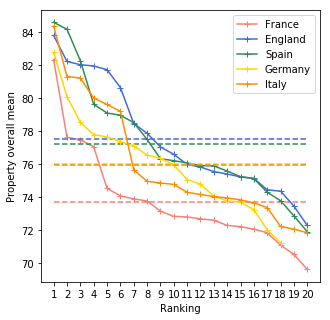

In [378]:
# merge points and values dataframes
teams_df = team_value[team_value['Club'].isin(df_clubs['Club'].tolist())][['Club','Nplayers','Mean_22pl','std_22pl']]
teams_df = pd.merge(teams_df, df_clubs, on='Club')
#
# plot mean team values for each league
colorsc = ['salmon', 'royalblue', 'seagreen', 'gold', 'darkorange', 'violet', 'darkturquoise', 'darkcyan', 'turquoise']
plt.figure(0,figsize=[5,5])
plt.xlabel('Ranking')
plt.ylabel('Property overall mean')
plt.xticks(range(21))
for ic, country in enumerate(list_countries):
    plt.plot(np.arange(1,len(teams_df[teams_df['Country'] == country])+1,1), 
             teams_df[teams_df['Country'] == country].Mean_22pl,
             color=colorsc[ic], marker='+', label=country)
    plt.plot([1,20], 
             [teams_df[teams_df['Country'] == country].Mean_22pl.mean(), teams_df[teams_df['Country'] == country].Mean_22pl.mean()], 
             ls='--', color=colorsc[ic])
    #plt.errorbar([1,20], 
    #             [teams_df[teams_df['Country'] == country].Mean_22pl.mean(), teams_df[teams_df['Country'] == country].Mean_22pl.mean()], 
    #             yerr=[teams_df[teams_df['Country'] == country].Mean_22pl.std(), teams_df[teams_df['Country'] == country].Mean_22pl.std()], 
    #             fmt='.', color=colorsc[ic])

plt.legend();

As expected, England and Spain are the two best leagues with an average value of $\sim 77.5$, followed by Germany and Italy with 76.0, and then France ($< 74$). The standard deviation are higher for England, Spain, and Italy than for France and Germany ($\sim 3.5$ vs $2.9$). For these three championships, this is due to the high number of top teams with values higher than 79: 6 for Spain, Italy, and England, vs only 2 for Germany and 1 for France.

#### Does the team property overall correlate with the current ranking in the championship ? That is, does the FIFA19 player property model predict well the league ranking in real-life ?

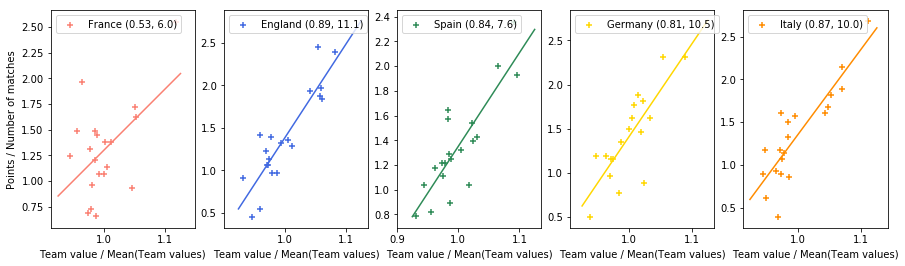

In [364]:
plt.figure(0,figsize=[15,4])
for ic, country in enumerate(list_countries):
    points = teams_df[teams_df['Country'] == country].Points
    value_norm = teams_df[teams_df['Country'] == country].Mean_22pl/teams_df[teams_df['Country'] == country].Mean_22pl.mean()
    slope, inter = np.polyfit(value_norm, points, 1)
    pearson = np.corrcoef(value_norm, points)[0, 1]
    plt.subplot(1,len(list_countries),ic+1)
    if ic == 0:
        plt.ylabel('Points / Number of matches')
    plt.xlabel('Team value / Mean(Team values)')
    plt.scatter(value_norm, points, marker='+', color=colorsc[ic], label=country+(' (%.2f, %.1f)' % (pearson, slope)))
    plt.plot([0.925,1.125],[0.925*slope+inter, 1.125*slope+inter],ls='-',color=colorsc[ic])
    plt.legend(loc='upper left');
points_all = teams_df.Points
value_norm_all = teams_df.Mean_22pl/teams_df.Mean_22pl.mean()
slope, inter = np.polyfit(points_all, value_norm_all, 1)


The plot above shows the normalized number of points at the end of March 2019 (number of points divided by the number of played games) as function of the normalised team property overall (team property overall divided by the mean within the corresponding league). The two values as the top of each plot are the Pearson coefficient and the slope of the fit. It can be seen that the Pearson coefficient is high ($> 0.80$) for all leagues but France, showing that the FIFA19 players model gives a good prediction of  the club ranking in real life. France, however, shows a low Pearson coefficient of 0.53 due to several surprising teams this year. Lille for instance has the 18th value in FIFA19 but is currently second in the league whereas Monaco which is fourth in FIFA19 is currently ranked 16th. 

   
### C) Player properties and position

Can we determine the position of the players according to their properties ? 

Do we see any porosity/link between the player positions ? 

#### Create the list of player properties and a more simple list of positions.

In [367]:
list_prop = ['Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling',
             'Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed',
             'Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots',
             'Aggression','Interceptions','Positioning','Vision','Penalties','Composure',
             'Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking',
             'GKPositioning','GKReflexes']
pos_dict = {'GK'  : ['GK'],
            'DEF_CENT' : ['CB', 'RCB', 'LCB'],
            'DEF_WING' : ['RB', 'RWB', 'LB', 'LWB'],
            'MID_DEF' : ['CDM', 'CM', 'RCM', 'LCM', 'LDM', 'RDM'],
            'MID_OFF' : ['CAM', 'RM', 'LM', 'RW', 'LW', 'LAM', 'RAM'],
            'ATT' : ['CF', 'RF', 'LF', 'ST', 'RS', 'LS']}
fifa19_df['Position2'] = fifa19_df['Position']
list_pos = fifa19_df['Position'].unique()
for key, value in pos_dict.items():
    fifa19_df['Position2'] = fifa19_df['Position2'].apply(lambda x: key if x in value else x)
list_pos2 = fifa19_df['Position2'].unique()

#### Normalize the player properties 

We first normalise the player properties, before performing any clustering analysis so we can study the relative properties of each player, regardless its overall level, in order to determine the player positions.

In [368]:
fifa19_df = fifa19_df.dropna(how='any', axis=0, subset=list_prop)
fifa19_prop_df = fifa19_df.copy()
fifa19_prop_df[list_prop] = fifa19_prop_df[list_prop].apply(lambda x: x/x.mean() if x.mean() != 0 else 1, axis=1) #/fifa19_df[list_prop].mean(axis=1)

#### First pairplot allowing us to visualize any correlation or cluster between selected properties 

We first plot the correlation plots between selected key properties in order to see if the positions can be clustered by eye.

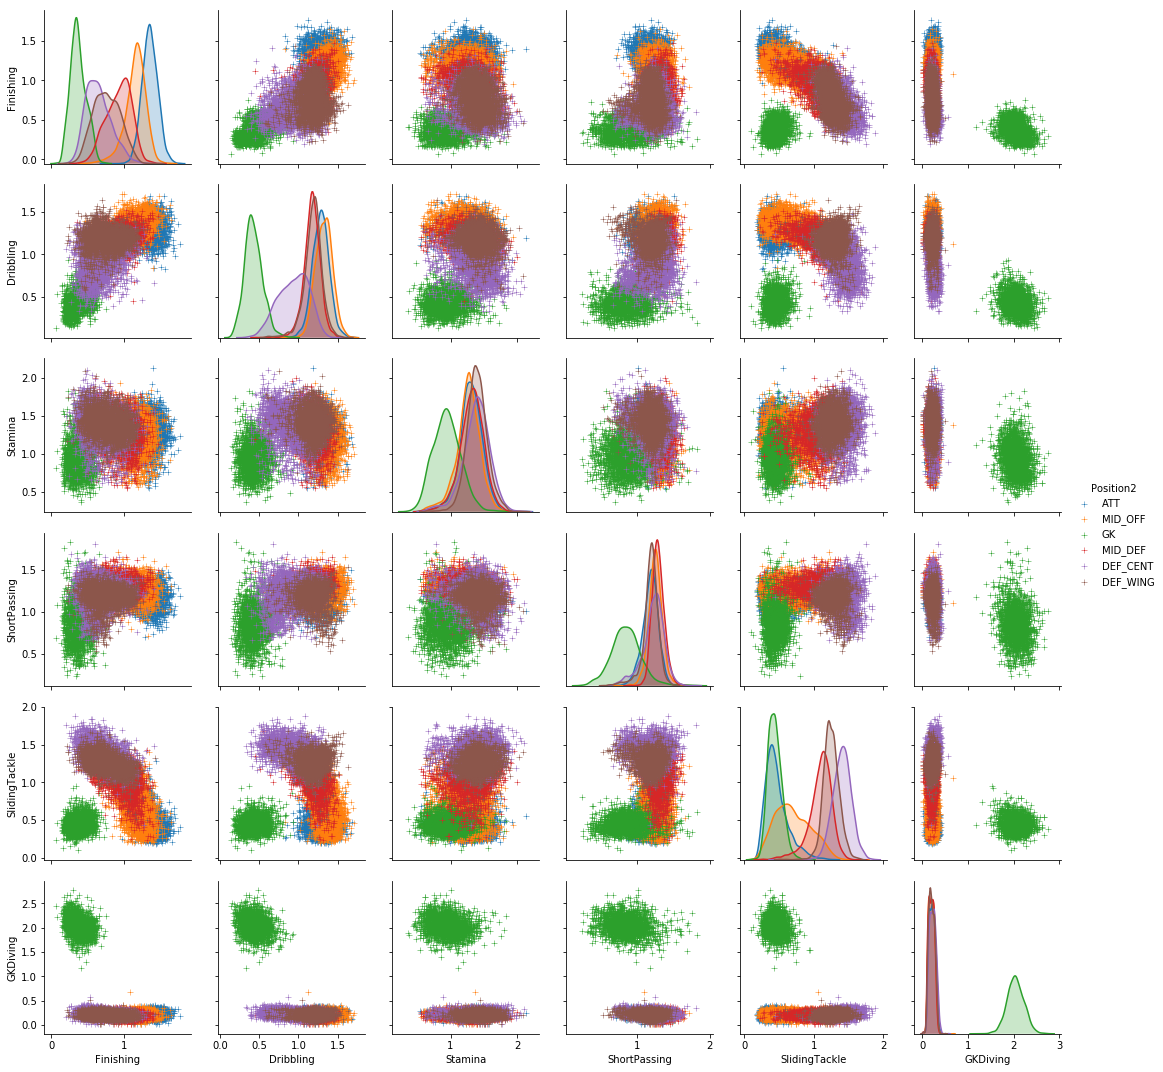

In [369]:
list_keyprop = ['Position2', 'Finishing', 'Dribbling', 'Stamina', 'ShortPassing', 'SlidingTackle', 'GKDiving']
g = sns.pairplot(fifa19_prop_df[list_keyprop], 
                 diag_kind='kde', markers="+",hue='Position2',
                 plot_kws=dict(s=30, edgecolor="red", linewidth=0.5),diag_kws=dict(shade=True)) #,xlim=([0,1],[10,25],[0,15]),ylim=([0,1],[10,25],[0,15])) #,xlim=

Clearly, the GK position stands out from the others since it requires a very specific set of skills. The situation i less clear for others. Attackers seem to better at finishing and dribbling, but defenders are better at tackling.

#### Clustering the player properties with K-Means algorithm

A clustering analysis of all the player properties is carried out with the K-means algorithm available in the sklearn package. We first scaled the player properties with StandardScaler()

In [371]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans 

list_prop2 = list_prop#[0:2]

scaler = StandardScaler()
fifa19_scaled = scaler.fit_transform(fifa19_prop_df[list_prop2])  #fifa19_prop_df[list_prop2] # 

kmeans = KMeans(n_clusters=6)
kmeans.fit(fifa19_scaled)
kmeans_inertia = kmeans.inertia_
labels = kmeans.predict(fifa19_scaled)
cluster_centers = kmeans.cluster_centers_
cluster_centers_df = pd.DataFrame({prop : [cluster_centers[icl][iprop] for icl in range(6)] for iprop, prop in enumerate(list_prop)})
#print(cluster_centers_df)

fifa19_prop_df['label'] = labels

crosstab_df = pd.DataFrame({'labels': labels, 'positions': fifa19_prop_df['Position2'].tolist()})
ct = pd.crosstab(crosstab_df['labels'], crosstab_df['positions'])
print(ct)

positions   ATT  DEF_CENT  DEF_WING    GK  MID_DEF  MID_OFF
labels                                                     
0          2152         3         0     0        6      284
1            67       384       741     0     2427      568
2             0         0         0  2025        0        0
3           434         0        22     0      342     2869
4             0      2386       117     0      124        2
5            14       315      1898     0      720      247


We selected 6 clusters, equal to the number of positions (goalkeeper, central defender, wing defender, defensive midfielder, offensive midfilder, and attaquant). 

It can be seen that every cluster corresponds to a well-defined position. All GK players lie in the same cluster for instance, while 77 \% of the central defenders, and 80 \% of the attackers lie in the same corresponding clusters. The situation is less clear for the wing defenders, and the defensive and offensive midfielders: only 68 \%, 67 \%, and 72 \% lie in their corresponding cluster, respectively. The rest are located in other clusters. For instance, 15 \% and 8 \% of the offensive midfielders lie in the defensive midfielder cluster and the attacker cluster, respectively, 21 \% of the defensive midfielders like in the wind defender cluster, and 28 \% of the wing defenders lie in the defensive midfielder cluster. There is consequently a porosity between these three positions since a significant fraction of offensive midfielders and wing defenders could also play defensive midfielders.

### D) Quality/price ratio

What are the best players to choose if I want to set up a squad with a limited budget ? 

#### Parameters that impact the most the player value (€)

Let's start by visualising the correlation between the player value, and the property overall, age, and relative potential for all players in the database

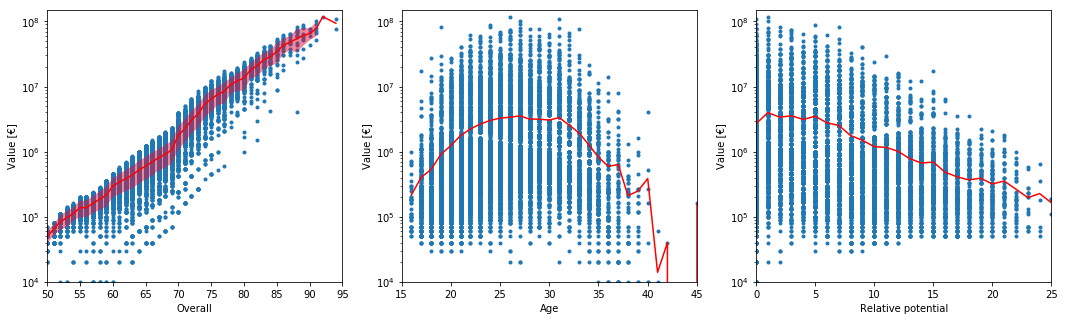

In [372]:
fig = plt.figure(0,figsize=[18,5])
#
plt.subplot(1,3,1)
plt.xscale('linear')
plt.yscale('log')
plt.xlim(50,95)
plt.ylim(1e4, 1.5e8)
plt.xlabel('Overall')
plt.ylabel('Value [€]')
plt.scatter(fifa19_df['Overall'], fifa19_df['Value_float'], marker='.')
plt.plot(fifa19_df.groupby(['Overall']).mean().index, 
         fifa19_df.groupby(['Overall']).mean()['Value_float'], ls='-',color='r')
plt.fill_between(fifa19_df.groupby(['Overall']).mean().index, 
                 fifa19_df.groupby(['Overall']).mean()['Value_float']+fifa19_df.groupby(['Overall']).std()['Value_float'],
                 fifa19_df.groupby(['Overall']).mean()['Value_float']-fifa19_df.groupby(['Overall']).std()['Value_float'], 
                 facecolor='crimson', alpha=0.5)
#
plt.subplot(1,3,2)
plt.xscale('linear')
plt.yscale('log')
plt.xlim(15,45)
plt.ylim(1e4, 1.5e8)
plt.xlabel('Age')
plt.ylabel('Value [€]')
plt.scatter(fifa19_df['Age'], fifa19_df['Value_float'], marker='.')
plt.plot(fifa19_df.groupby(['Age']).mean().index, 
         fifa19_df.groupby(['Age']).mean()['Value_float'], ls='-',color='r')
#
plt.subplot(1,3,3)
plt.xscale('linear')
plt.yscale('log')
plt.xlim(0,25)
plt.ylim(1e4, 1.5e8)
plt.xlabel('Relative potential')
plt.ylabel('Value [€]')
plt.scatter(fifa19_df['Potential_rel'], fifa19_df['Value_float'], marker='.')
plt.plot(fifa19_df.groupby(['Potential_rel']).mean().index, 
         fifa19_df.groupby(['Potential_rel']).mean()['Value_float'], ls='-',color='r');

At first glance, it seems that the property overall of players impacts the most their value. For a given property overall, the dispersion of values could be due to either the age, their potential, or their position. 

Players tend to be more expensive between 24 and 30 years old. Is it because they are simply better or because the clubs do not want to invest a lot of money if they are old? 

Interestingly, the player value seems to decrease with the relative potential. Is it because players with high relative potential have a low current property overall ?

Now let's re-show the same correlations but with avering the curves for the different positions, and property overalls.

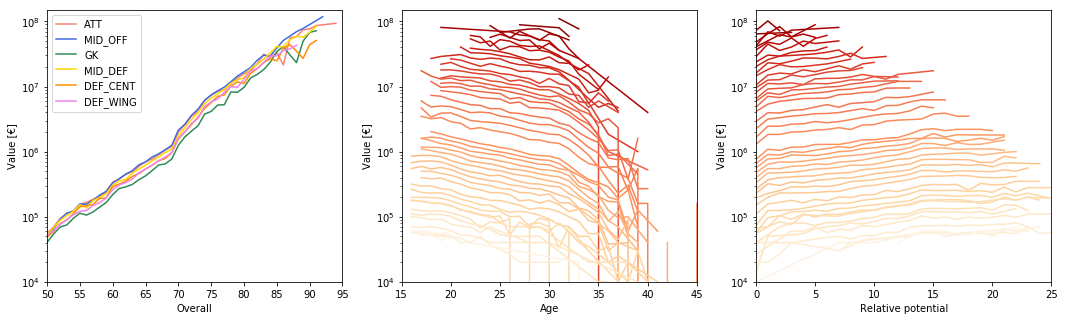

In [233]:
list_pos2 = fifa19_df['Position2'].unique()[:-1]
list_age = fifa19_df['Age'].unique()[:-1]#.sort_values()
list_overall = fifa19_df['Overall'].unique()[:-1]#.sort_values()
#
fig = plt.figure(0,figsize=[18,5])
#
plt.subplot(1,3,1)
plt.xscale('linear')
plt.yscale('log')
plt.xlim(50,95)
plt.ylim(1e4, 1.5e8)
plt.xlabel('Overall')
plt.ylabel('Value [€]')
for ipos, pos in enumerate(list_pos2):
    plt.plot(fifa19_df[(fifa19_df['Position2'] == pos)].groupby(['Overall']).mean().index, 
             fifa19_df[(fifa19_df['Position2'] == pos)].groupby(['Overall']).mean()['Value_float'], 
             ls='-',color=colorsc[ipos], label=pos)
plt.legend()
#
plt.subplot(1,3,2)
plt.xscale('linear')
plt.yscale('log')
plt.xlim(15,45)
plt.ylim(1e4, 1.5e8)
plt.xlabel('Age')
plt.ylabel('Value [€]')
for iov, over in enumerate(list_overall):
    plt.plot(fifa19_df[fifa19_df['Overall'] == over].groupby(['Age']).mean().index, 
             fifa19_df[fifa19_df['Overall'] == over].groupby(['Age']).mean()['Value_float'], 
             ls='-',color=plt.cm.OrRd_r(iov/len(list_overall))) #colorsc[iov])
#
plt.subplot(1,3,3)
plt.xscale('linear')
plt.yscale('log')
plt.xlim(0,25)
plt.ylim(1e4, 1.5e8)
plt.xlabel('Relative potential')
plt.ylabel('Value [€]')
for iov, over in enumerate(list_overall):
    plt.plot(fifa19_df[fifa19_df['Overall'] == over].groupby(['Potential_rel']).mean().index, 
             fifa19_df[fifa19_df['Overall'] == over].groupby(['Potential_rel']).mean()['Value_float'], 
             ls='-',color=plt.cm.OrRd_r(iov/len(list_overall))) 

The player values are once again plotted against their property overall, age, and relative potential but this time only means are shown for each player position (left panel), and each player property overall for the middle and right panels (red color scale shows the property overall, yellow and red mean low and high overalls, resp.). 

It can be noticed that the position plays a non-negligible role: attackers and offensive midfielders seem to be slightly more expensive for a given property overall, followed by defensive midfielders, wing defenders, center defenders, and finally goalkeepers.

For a given property overall, the player value seems to slowly decrease by a factor of 5 between 18 and 32 years old and then drops more sharply.

Finally, for a given property overall, the player value slowly increases with the relative potential of the player by a factor of two. 

#### 1D linear regression of log(Value)

Let's perform a linear regression between the player value and the property overall, for each of the six defined positions. 

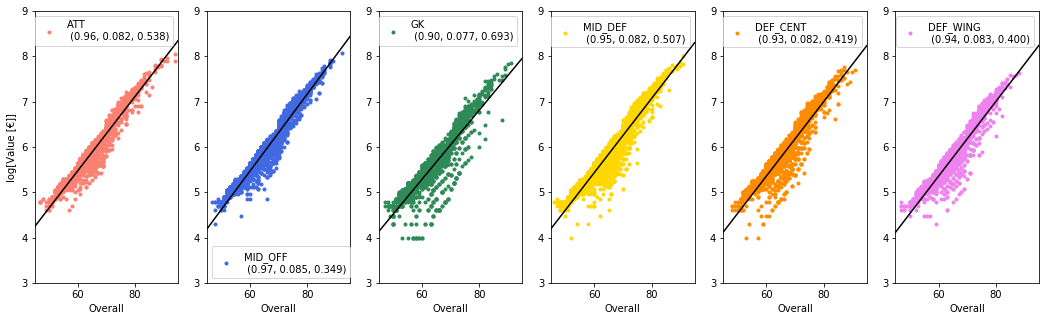

In [373]:
list_pos2 = fifa19_df['Position2'].unique()[:-1]
fig = plt.figure(0,figsize=[18,5])
#
for ipos, pos in enumerate(list_pos2):
    fifa19_2 = fifa19_df[(fifa19_df['Position2'] == pos)]
    fifa19_2 = fifa19_2[(fifa19_2['Value_float'] > 0)]
    overall = fifa19_2['Overall'].tolist() ; logvalue = np.log10(fifa19_2['Value_float']).tolist()
    slope, inter = np.polyfit(overall, logvalue, 1)
    pearson = np.corrcoef(overall, logvalue)[0, 1]
    #print(ipos, pearson)
    # plot
    plt.subplot(1,len(list_pos2),ipos+1)
    plt.xscale('linear')
    plt.yscale('linear')
    plt.xlim(45,95)
    plt.ylim(3, 9)
    plt.xlabel('Overall')
    if ipos == 0:
        plt.ylabel('log[Value [€]]')
    else:
        plt.ylabel(' ')
    #print(fifa19_2.info())
    plt.scatter(overall, logvalue, marker='.', c=colorsc[ipos], label=pos+('\n (%.2f, %.3f, %.3f)' % (pearson, slope, inter)))
    plt.plot([45,95],[45*slope+inter, 95*slope+inter],ls='-',color='k')
    plt.legend()


This plot shows the log of players value as function of the property overall for each position. The Pearson coefficient, the slope, and the intercept are given in the legend of each panel. 

The high Pearson coefficient for all positions suggests that the overall value is indeed the most important parameter for the price of a player. Although the most expensive players are attackers of offensive midfielders, the slope is roughly similar between the different positions, although the one for goalkeepers seems to be less pronounced. 

Can we now predict the player value from its property overall, position, age, and relative potential?

#### Multi-variable linear regression of log(Value)

In [374]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

fifa19_pos = []
reg = LinearRegression()
#
print('log(Value) as function of property overall, age, and relative potential for the six positions')
for ipos, pos in enumerate(list_pos2):
    fifa19_2 = fifa19_df[(fifa19_df['Position2'] == pos)]#[prop_pca]
    fifa19_2 = fifa19_2[(fifa19_2['Value_float'] > 0)]
    fifa19_2['logValue'] = np.log10(fifa19_2['Value_float'])
    #
    X_train, X_test, y_train, y_test = train_test_split(fifa19_2[['Overall', 'Age', 'Potential_rel']],
                                                        fifa19_2['logValue'], test_size = 0.2, random_state=42)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    
    print('%10s: log(Value) = %.4f*Overall + %.4f*Age + %.4f*Potential + %.4f' %
         (pos, reg.coef_[0], reg.coef_[1], reg.coef_[2], reg.intercept_))
    
    fifa19_2['Valueratio'] = fifa19_2['logValue']/reg.predict(fifa19_2[['Overall', 'Age', 'Potential_rel']])
    fifa19_pos.append(fifa19_2)

log(Value) as function of property overall, age, and relative potential for the six positions
       ATT: log(Value) = 0.0942*Overall + -0.0328*Age + 0.0015*Potential + 0.5563
   MID_OFF: log(Value) = 0.0949*Overall + -0.0266*Age + 0.0061*Potential + 0.3153
        GK: log(Value) = 0.0948*Overall + -0.0601*Age + -0.0094*Potential + 1.1241
   MID_DEF: log(Value) = 0.0938*Overall + -0.0419*Age + -0.0017*Potential + 0.7817
  DEF_CENT: log(Value) = 0.0964*Overall + -0.0499*Age + -0.0053*Potential + 0.7807
  DEF_WING: log(Value) = 0.0943*Overall + -0.0445*Age + -0.0021*Potential + 0.7502


#### Use the linear regression model to assess what are the players with the best quality/price ratio

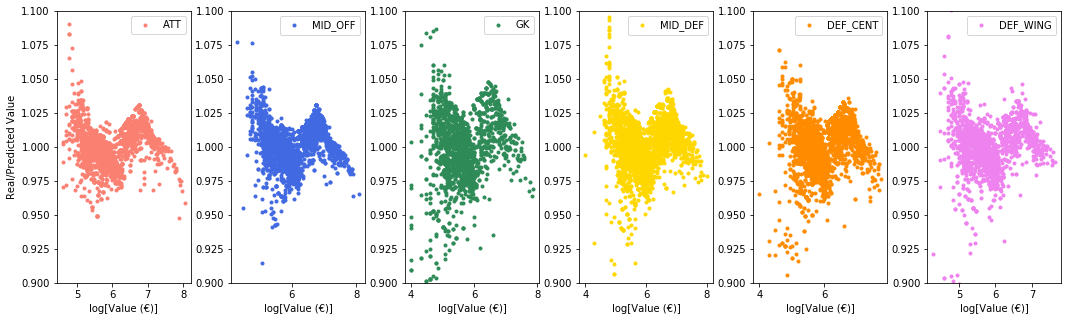

In [261]:
fig = plt.figure(0,figsize=[18,5])
plt.subplots_adjust(wspace=0.3, hspace=0.0)
for ipos, pos in enumerate(list_pos2):
    plt.subplot(1,len(list_pos2),ipos+1)
    plt.xscale('linear')
    plt.yscale('linear')
    #plt.xlim(45,95)
    plt.ylim(0.9,1.1)
    #plt.ylim(fifa19_pos[ipos]['Valueratio'].min(), fifa19_pos[ipos]['Valueratio'].max())
    plt.xlabel('log[Value (€)]')
    if ipos == 0:
        plt.ylabel('Real/Predicted Value')
    else:
        plt.ylabel(' ')
    #print(fifa19_2.info())
    plt.scatter(fifa19_pos[ipos]['logValue'], fifa19_pos[ipos]['Valueratio'], marker='.', c=colorsc[ipos], label=pos)
    plt.legend()

The plot shows the ratio between the real value given in FIFA19 and the value predicted by the linear regression model for each of the six positions. Note that for all positions, the ratio follows the same trend: it decreases between log(Value) of 5 and 6, then increases until log(Value) = 7, and then re-decreases.

Now let's use the linear regression model to assess what are the players with the best quality/value ratio.

Let's take an example of a club manager who wants to hire 11 "young" (i.e. $< 25$ yr old) players to set up a new team. With his budget, he wants to spend $\sim$ 10 M for a goalkeeper, $\sim$ 50 M for four defenders, $\sim$ 80 M for four midfielders, and $\sim$ 50 M for two attackers. What are the best players to choose ?

We want to rank young players that correspond to the budget criteria (by let's say 20\%) with the quality/price ratio as given by our linear regression model. 


In [375]:
budget = {'GK' : 1e7, 'DEF_CENT' : 1.25e7, 'DEF_WING' : 1.25e7, 'MID_DEF' : 2e7, 'MID_OFF' : 2e7, 'ATT' : 2.5e7}
eps = 0.3

for ipos, pos in enumerate(list_pos2):
    print('%s: %i +- %i M€' % (pos, budget[pos]/1e6, eps*budget[pos]/1e6))
    selection = ((fifa19_pos[ipos]['Value_float'] > budget[pos]*(1-eps)) & 
                (fifa19_pos[ipos]['Value_float'] < budget[pos]*(1+eps)) &
                (fifa19_pos[ipos]['Age'] < 25.))
    fifa19_pos_sel = fifa19_pos[ipos][selection].sort_values('Valueratio', ascending=False)
    print('%i players in the database' % len(fifa19_pos_sel))
    print(fifa19_pos_sel[['Name', 'Age', 'Nationality', 'Club', 'Value', 'Valueratio']].head(5))
    print(' ')

ATT: 25 +- 7 M€
14 players in the database
             Name  Age         Nationality         Club   Value  Valueratio
350      A. Milik   24              Poland       Napoli  €25.5M    1.000205
569   André Silva   22            Portugal   Sevilla FC    €19M    0.999303
430       Mariano   24  Dominican Republic  Real Madrid    €20M    0.999055
460  M. Batshuayi   24             Belgium  Valencia CF  €19.5M    0.997751
252    A. Belotti   24               Italy       Torino    €30M    0.997450
 
MID_OFF: 20 +- 6 M€
38 players in the database
               Name  Age Nationality                 Club Value  Valueratio
582        F. Cervi   24   Argentina           SL Benfica  €17M    1.003517
643  M. Gregoritsch   24     Austria          FC Augsburg  €16M    1.001564
624  L. Bittencourt   24     Germany  TSG 1899 Hoffenheim  €16M    1.001564
585        A. Rebić   24     Croatia  Eintracht Frankfurt  €16M    1.001564
646      R. Barkley   24     England              Chelsea  €16M    1.001

This gives the list of players with the best quality/value ratio for each of the six positions. 

### PCA analysis of the player properties and their value

In [376]:
from sklearn.decomposition import PCA

features = [] ; variance = [] ; transformed = [] ; 
components = [] ; singular_values = [] ; loadings = []
prop_pca = ['Value_float', 'Overall', 'Age', 'Potential_rel'] #+ list_prop ['Overall'] + 
pca = PCA(n_components=4)
scaler = StandardScaler()

for ipos, pos in enumerate(list_pos2):
    fifa19_pca = fifa19_df[(fifa19_df['Position2'] == pos)][prop_pca]
    fifa19_pca = fifa19_pca[(fifa19_pca['Value_float'] > 0)]
    fifa19_pca['Value_float'] = np.log10(fifa19_pca['Value_float'])
    #print(fifa19_pca.head(5))
    fifa19_scaled =  scaler.fit_transform(fifa19_pca) 

    pca.fit(fifa19_pca)
    features.append(range(pca.n_components_))
    variance.append(pca.explained_variance_ratio_)
    components.append(pca.components_)
    loadings.append(pca.components_.T * np.sqrt(pca.explained_variance_))
    singular_values.append(pca.singular_values_)
    transformed.append(pca.transform(fifa19_pca));

#print(components[0])
#print(loadings[0])
    

/Users/vianneytaquet/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/vianneytaquet/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/vianneytaquet/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/vianneytaquet/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/vianneytaquet/anaconda3/lib/python3.7/site-packag

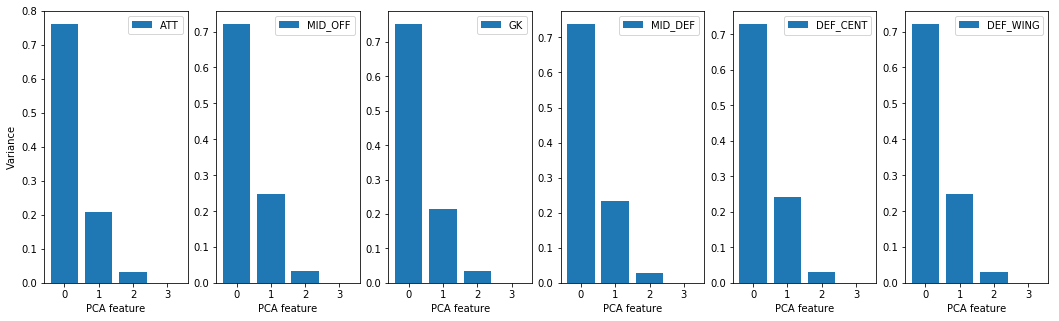

In [155]:
fig = plt.figure(0,figsize=[18,5])
for ipos, pos in enumerate(list_pos2):
    plt.subplot(1,len(list_pos2),ipos+1)
    plt.bar(features[ipos], variance[ipos], label=pos)
    plt.xticks(features[ipos])
    plt.xlabel('PCA feature')
    if ipos == 0:
        plt.ylabel('Variance')
    plt.legend()
    

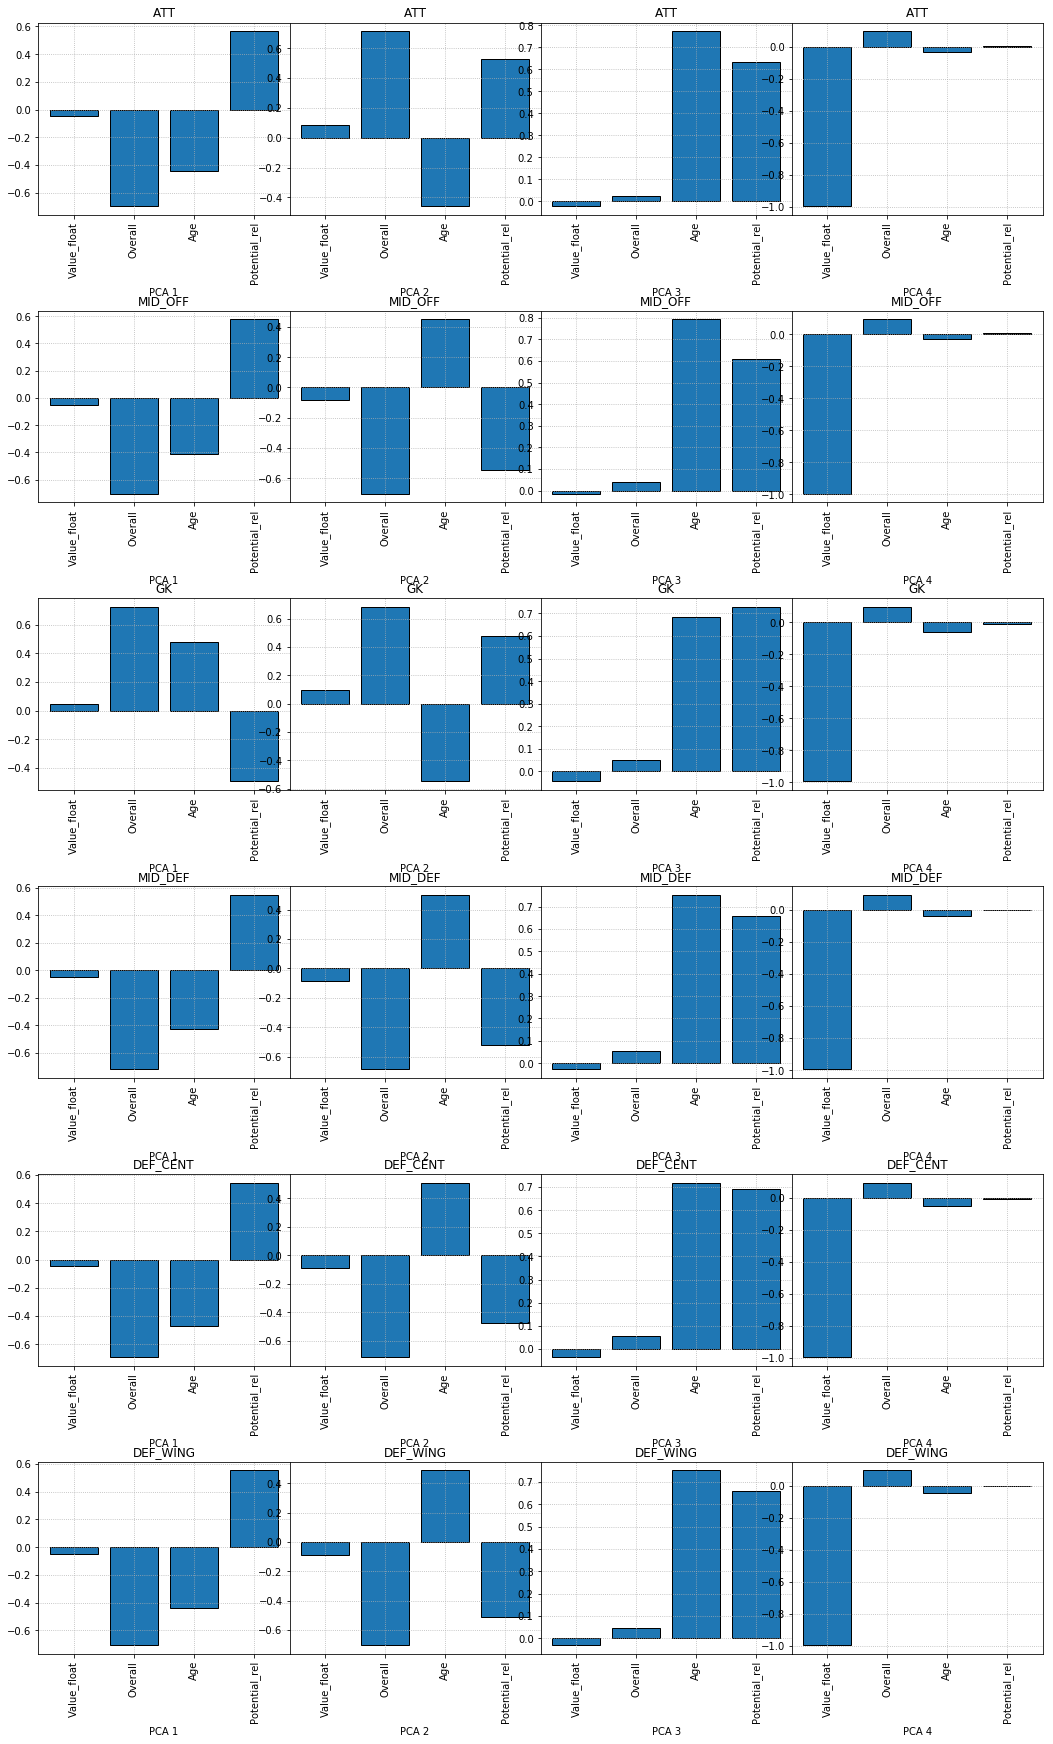

In [156]:
fig = plt.figure(ipos,figsize=[18,5*len(list_pos2)]) ; iplot = 0
plt.subplots_adjust(wspace=0.0, hspace=0.5)
for ipos, pos in enumerate(list_pos2):
    for ipca in range(pca.n_components_):
        iplot += 1
        #print(iplot, ipos, ipca, pca.n_components_,len(list_pos2))
        plt.subplot(len(list_pos2),pca.n_components_,iplot)
        plt.grid(True, ls=':')
        #plt.bar(range(len(prop_pca)),loadings[0][:,ipca]) #, label=pos)
        plt.bar(range(len(prop_pca)),components[ipos][ipca,:], edgecolor='k') #, label=pos)
        plt.xticks(range(len(prop_pca)), prop_pca[:], rotation=90)
        #plt.xticks(features[ipos])
        plt.xlabel('PCA%2i' %(ipca+1))
        if ipca == 0:
            plt.ylabel('')
        plt.title(pos)
        #plt.legend()
    

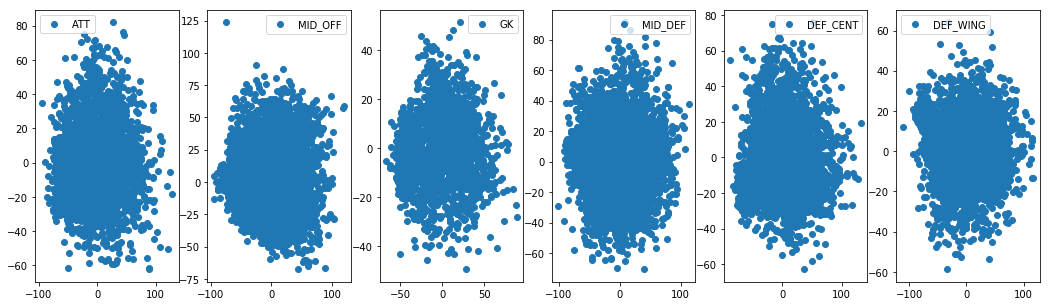

In [115]:
fig = plt.figure(1,figsize=[18,5])
for ipos, pos in enumerate(list_pos2):
    plt.subplot(1,len(list_pos2),ipos+1)
    plt.scatter(transformed[ipos][:,0], transformed[ipos][:,1], label=pos)
    plt.legend()

In [231]:
for ipos, pos in enumerate(list_pos2):

SyntaxError: unexpected EOF while parsing (<ipython-input-231-5432ac23d24e>, line 1)

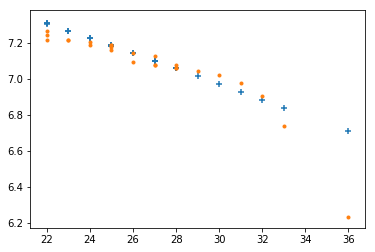

In [212]:
X_pos80 = fifa19_pca[fifa19_pca['Overall'] == 80]
#print(reg.predict(X_pos80))
#plt.scatter(X_test['Age'], y_test, marker='.')
#plt.scatter(X_test['Age'], y_pred, marker='+')
plt.scatter(X_pos80['Age'], X_pos80['Value_float'], marker='.')
plt.scatter(X_pos80['Age'], reg.predict(X_pos80[['Overall', 'Age', 'Potential_rel']]), marker='+')
#plt.scatter(fifa19_pca[fifa19_pca['Overall'] == 80]['Age'], reg.predict(fifa19_pca[fifa19_pca['Overall'] == 80]), marker='+', color='r')